In [1]:
import sys, glob
import numpy as np
import xarray as xr
import time

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
from matplotlib.colors import LogNorm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


/work/logiciels/rh7/conda/4.5.4/envs/pangeo_full_201902/lib/python3.7/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


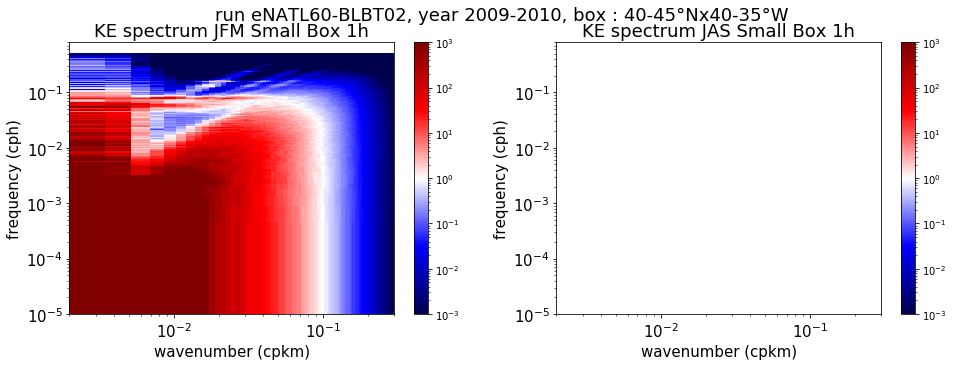

In [6]:
ds_JFM=xr.open_dataset('KE_Spectrum_JFM_w_k_from_1h_eNATL60-BLBT02.nc')
ds_JAS=xr.open_dataset('KE_Spectrum_JAS_w_k_from_1h_eNATL60-BLBT02.nc')

wavenumber_JFM=ds_JFM['wavenumber']
frequency_JFM=ds_JFM['frequency']
KE_JFM_wavenum_freq_spectrum=ds_JFM['Ke_spectrum']

wavenumber_JAS=ds_JAS['wavenumber']
frequency_JAS=ds_JAS['frequency']
KE_JAS_wavenum_freq_spectrum=ds_JAS['Ke_spectrum']


sec_to_hour = 3600.0
norm = LogNorm(vmin=0.001,vmax=1000)
cmap = div_cmap

fig=plt.figure(figsize=(16,5))

ax = plt.subplot(121)
plt.pcolormesh(wavenumber_JFM,sec_to_hour*frequency_JFM,KE_JFM_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(wavenumber_JFM.min(),wavenumber_JFM.max())
ax.set_ylim(1E-5,8E-1)
ax.set_xlim(2E-3,3E-1)
ax.set_title('KE spectrum JFM Small Box 1h',size=18)
ax.tick_params(labelsize=15)
plt.legend
plt.colorbar()

ax = plt.subplot(122)
plt.pcolormesh(wavenumber_JAS,sec_to_hour*frequency_JAS,KE_JAS_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(wavenumber_JAS.min(),wavenumber_JAS.max())
ax.set_ylim(1E-5,8E-1)
ax.set_xlim(2E-3,3E-1)
ax.set_title('KE spectrum JAS Small Box 1h',size=18)
ax.tick_params(labelsize=15)
plt.legend
plt.colorbar()

plt.suptitle('run eNATL60-BLBT02, year 2009-2010, box : 40-45°Nx40-35°W',size=18)
plt.savefig('KE_spectrum_eNATL60-BLBT02_JFM-JAS_smallbox.png')